In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

sns.set(color_codes = True)

In [17]:
data = pd.read_csv("iris.csv")

In [18]:
data.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [19]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [20]:
data.reset_index(drop = True, inplace= True)

In [21]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [23]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [28]:
data.groupby("species").size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

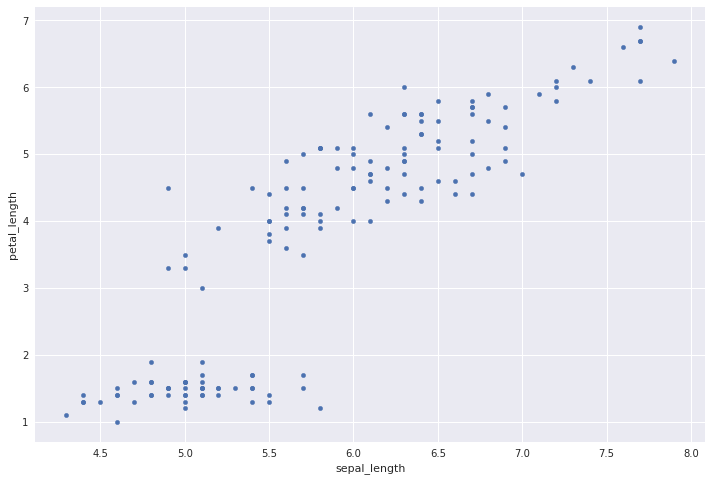

In [31]:
data.plot(kind = 'scatter', x = 'sepal_length', y = 'petal_length', figsize= (12, 8))

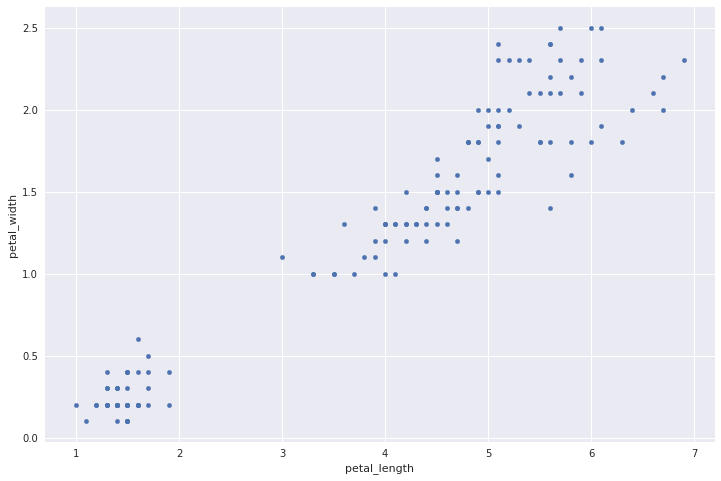

In [32]:
data.plot(kind = 'scatter', x = 'petal_length', y = 'petal_width', figsize=(12, 8))

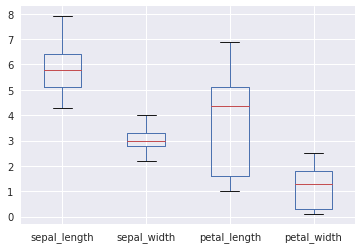

In [33]:
data.plot(kind = 'box', sharex = False, sharey = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87fd884b00>,
      dtype=object)

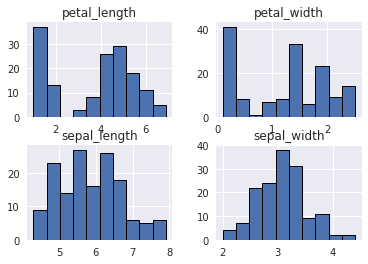

In [35]:
data.hist(edgecolor = "Black", linewidth = 1.0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87fda3f0f0>,
      dtype=object)

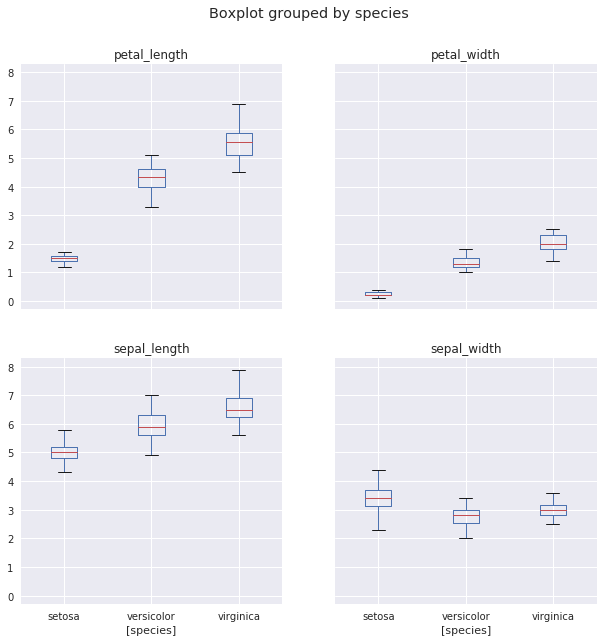

In [36]:
data.boxplot(by = 'species', figsize = (10, 10))

In [37]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87fd341e48>,
      dtype=object)

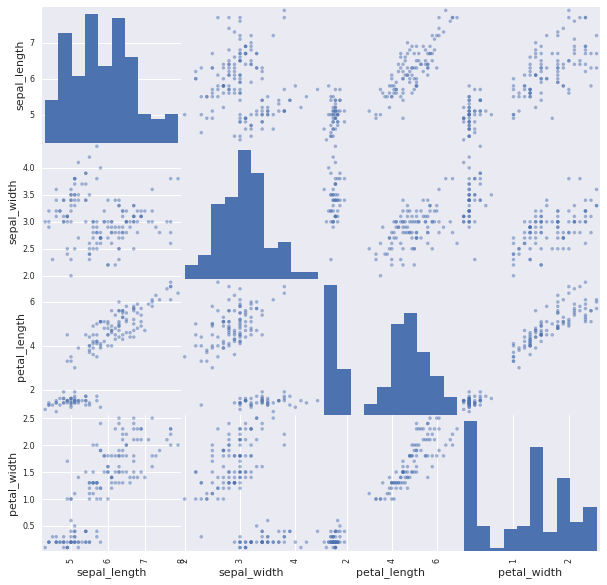

In [38]:
scatter_matrix(data, figsize = (10, 10))

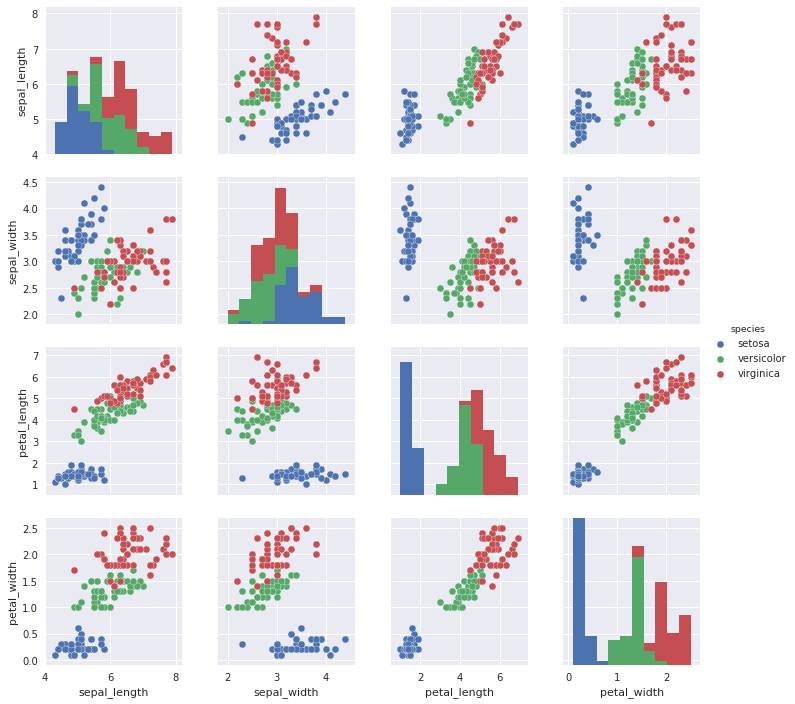

In [39]:
sns.pairplot(data, hue = 'species')

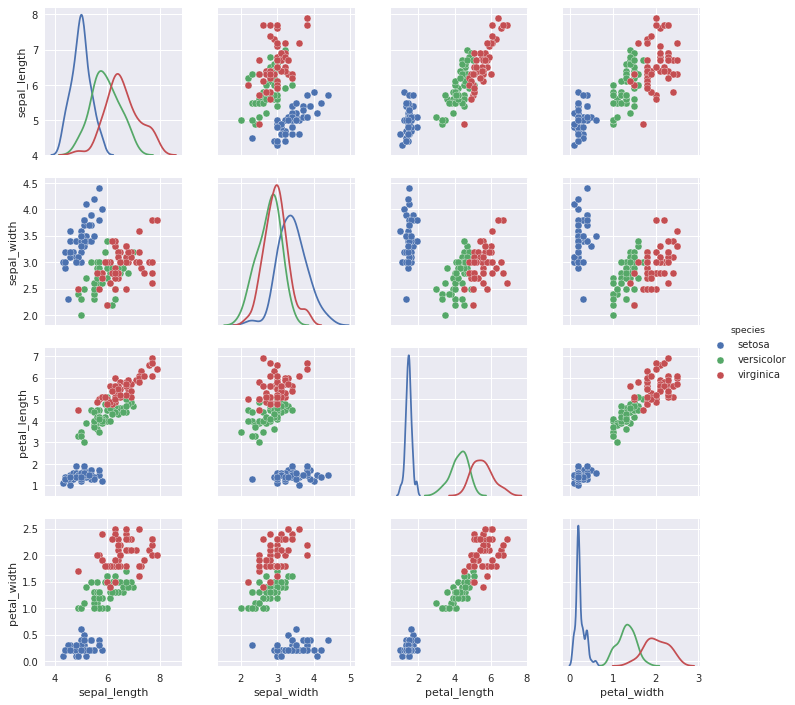

In [40]:
sns.pairplot(data, hue = 'species', diag_kind = 'kde')

In [41]:
from sklearn.metrics import confusion_matrix

In [43]:
from sklearn.metrics import classification_report

In [44]:
X_data = data.iloc[:, :-1].values

In [45]:
Y_data = data.iloc[:, -1].values

In [46]:
from sklearn.cross_validation import train_test_split

In [47]:
X_train, X_test, y_train, t_test = train_test_split(X_data, Y_data, test_size = 0.3, random_state = 20)

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
predicted_Y = classifier.predict(X_test)

In [53]:
print(classification_report(t_test, predicted_Y))
print(confusion_matrix(t_test, predicted_Y))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.89      0.89      0.89        18
  virginica       0.86      0.86      0.86        14

avg / total       0.91      0.91      0.91        45

[[13  0  0]
 [ 0 16  2]
 [ 0  2 12]]


In [54]:
from sklearn.metrics import accuracy_score

In [55]:
print("Accuracy is ", accuracy_score(predicted_Y, t_test))

Accuracy is  0.9111111111111111


In [56]:
from sklearn.svm import SVC

In [58]:
classifier_svm = SVC()
classifier_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [59]:
predicted_Y_svm = classifier.predict(X_test)

In [60]:
print(classification_report(t_test, predicted_Y_svm))
print(confusion_matrix(t_test, predicted_Y_svm))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.90      1.00      0.95        18
  virginica       1.00      0.86      0.92        14

avg / total       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 18  0]
 [ 0  2 12]]


In [62]:
print( "Accuracy is (SVM) ", accuracy_score(predicted_Y_svm, t_test))

Accuracy is (SVM)  0.9555555555555556


In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
classifier_KNN = KNeighborsClassifier()
classifier_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [67]:
predicted_Y_KNN = classifier_KNN.predict(X_test)

In [68]:
print(classification_report(t_test, predicted_Y_KNN))
print(confusion_matrix(t_test, predicted_Y_KNN))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.94      0.94      0.94        18
  virginica       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        45

[[13  0  0]
 [ 0 17  1]
 [ 0  1 13]]


In [69]:
print("Accuracy is ( KNN)", accuracy_score(t_test, predicted_Y_KNN))

Accuracy is ( KNN) 0.9555555555555556


In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
classifier_DecTree = DecisionTreeClassifier()

In [72]:
classifier_DecTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
predicted_Y_DT = classifier_DecTree.predict(X_test)

In [74]:
print(classification_report(t_test, predicted_Y_DT))
print(confusion_matrix(t_test, predicted_Y_DT))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        13
 versicolor       0.78      1.00      0.88        18
  virginica       1.00      0.64      0.78        14

avg / total       0.91      0.89      0.88        45

[[13  0  0]
 [ 0 18  0]
 [ 0  5  9]]


In [75]:
print("Accuracy is ( for decision tree classifier)", accuracy_score(t_test, predicted_Y_DT))

Accuracy is ( for decision tree classifier) 0.8888888888888888
